In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cp /content/drive/MyDrive/DATA/sushi1.zip sushi1.zip


In [1]:
!nvidia-smi


Mon Nov  1 11:46:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
!cp /content/drive/MyDrive/DATA/sushi0.zip sushi0.zip

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
!unzip /content/sushi1.zip

Archive:  /content/sushi1.zip
   creating: sushi1/
   creating: sushi1/ebi/
  inflating: sushi1/ebi/I75A8167.JPG  
  inflating: sushi1/ebi/I75A8168.JPG  
  inflating: sushi1/ebi/I75A8649.JPG  
  inflating: sushi1/ebi/I75A8650.JPG  
  inflating: sushi1/ebi/I75A8695.JPG  
  inflating: sushi1/ebi/I75A8849.JPG  
  inflating: sushi1/ebi/I75A8851.JPG  
  inflating: sushi1/ebi/I75A8855.JPG  
  inflating: sushi1/ebi/I75A8934.JPG  
  inflating: sushi1/ebi/I75A8935.JPG  
  inflating: sushi1/ebi/I75A8936.JPG  
  inflating: sushi1/ebi/I75A9122.JPG  
  inflating: sushi1/ebi/IMG_0437.JPEG  
  inflating: sushi1/ebi/IMG_0438.JPEG  
  inflating: sushi1/ebi/IMG_0860.JPEG  
  inflating: sushi1/ebi/IMG_0861.JPEG  
  inflating: sushi1/ebi/IMG_0862.JPEG  
  inflating: sushi1/ebi/IMG_0863.JPEG  
  inflating: sushi1/ebi/IMG_1983.JPEG  
  inflating: sushi1/ebi/IMG_1984.JPEG  
  inflating: sushi1/ebi/IMG_2016.JPEG  
  inflating: sushi1/ebi/IMG_2017.JPEG  
  inflating: sushi1/ebi/IMG_5190.JPEG  
  inflating: sus

In [10]:
!unzip /content/sushi0.zip

Archive:  /content/sushi0.zip
   creating: sushi2/
   creating: sushi2/ebi/
  inflating: sushi2/ebi/IMG_0437.JPEG  
  inflating: sushi2/ebi/IMG_0438.JPEG  
  inflating: sushi2/ebi/IMG_0860.JPEG  
  inflating: sushi2/ebi/IMG_0861.JPEG  
  inflating: sushi2/ebi/IMG_0862.JPEG  
  inflating: sushi2/ebi/IMG_0863.JPEG  
  inflating: sushi2/ebi/IMG_1983.JPEG  
  inflating: sushi2/ebi/IMG_1984.JPEG  
  inflating: sushi2/ebi/IMG_2016.JPEG  
  inflating: sushi2/ebi/IMG_2017.JPEG  
  inflating: sushi2/ebi/IMG_5190.JPEG  
  inflating: sushi2/ebi/IMG_5191.JPEG  
  inflating: sushi2/ebi/IMG_5534.JPEG  
  inflating: sushi2/ebi/IMG_5535.JPEG  
  inflating: sushi2/ebi/IMG_6388.JPEG  
  inflating: sushi2/ebi/IMG_6389.JPEG  
  inflating: sushi2/ebi/IMG_6390.JPEG  
  inflating: sushi2/ebi/IMG_7292.JPEG  
  inflating: sushi2/ebi/IMG_8225.JPEG  
  inflating: sushi2/ebi/IMG_8226.JPEG  
  inflating: sushi2/ebi/IMG_8227.JPEG  
   creating: sushi2/kohada/
  inflating: sushi2/kohada/IMG_0413.JPEG  
  inflating: 

In [11]:
data_dir = '/content/sushi1'

In [12]:
PIL.Image.open('/content/sushi2/maguro/IMG_3079.JPEG')

Output hidden; open in https://colab.research.google.com to view.

In [13]:
!top

=top - 11:48:45 up 6 min,  0 users,  load average: 0.69, 0.37, 0.17
Tasks:  16 total,   1 running,  15 sleeping,   0 stopped,   0 zombie
%Cpu(s):  7.8 us,  5.1 sy,  0.0 ni, 83.4 id,  3.3 wa,  0.0 hi,  0.4 si,  0.0 st
KiB Mem : 13302924 total,  6355332 free,   937096 used,  6010496 buff/cache
KiB Swap:        0 total,        0 free,        0 used. 12170056 avail Mem 

    PID USER      PR  NI    VIRT    RES    SHR S  %CPU %MEM     TIME+ COMMAND   
     76 root      20   0 2091876 421972 171752 S   6.7  3.2   0:06.75 python3   
      1 root      20   0     992      4      0 S   0.0  0.0   0:00.50 docker-i+ 
      7 root      20   0  359008  64780  32072 S   0.0  0.5   0:01.46 node      
     17 root      20   0   35892   4848   3756 S   0.0  0.0   0:00.51 tail      
     39 root      20   0  160356  41672  12940 S   0.0  0.3   0:00.47 colab-fi+ 
     64 root      20   0  252748 110164  13900 S   0.0  0.8   0:01.83 jupyter-+ 
     65 root      20   0  707976  10080   4340 S   0.0  0.1   

In [14]:
batch_size = 9
img_height = 180
img_width = 180

In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 287 files belonging to 4 classes.
Using 230 files for training.


In [16]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 287 files belonging to 4 classes.
Using 57 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['ebi', 'kohada', 'maguro', 'uni']


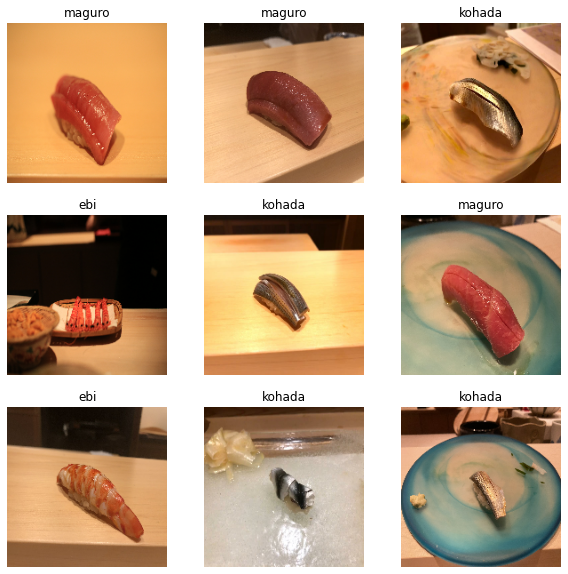

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [19]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(9, 180, 180, 3)
(9,)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image)) 

0.023202457 1.0


In [23]:
num_classes = 4

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

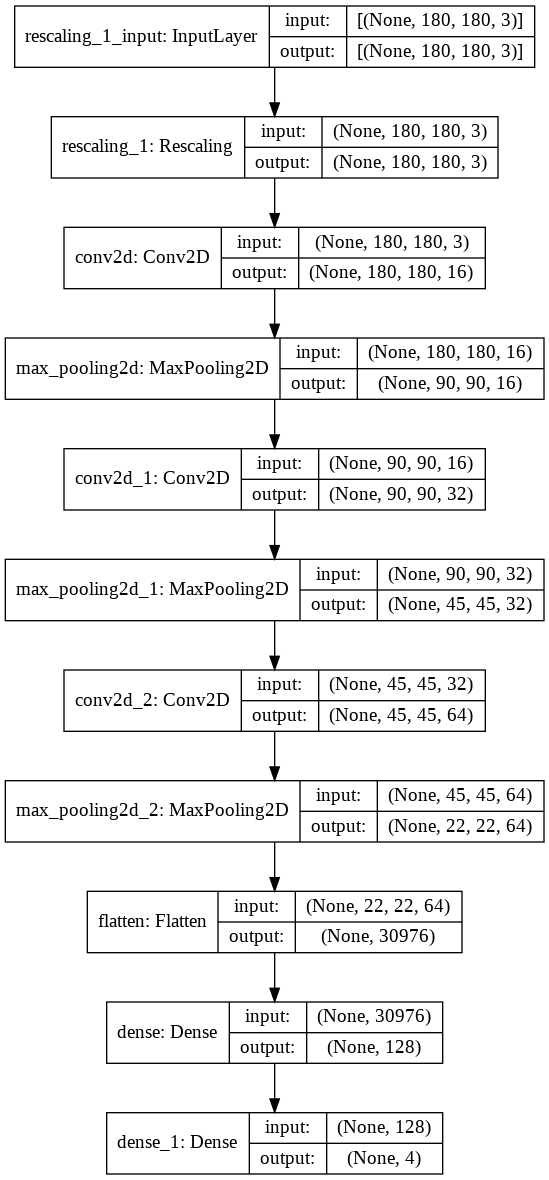

In [26]:
import tensorflow as tf
tf.keras.utils.plot_model(model,show_shapes=True)

In [27]:
epochs=100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
26/26 [==============================] - 33s 129ms/step - loss: 1.5172 - accuracy: 0.3348 - val_loss: 1.2312 - val_accuracy: 0.4912
Epoch 2/100
26/26 [==============================] - 0s 16ms/step - loss: 1.0489 - accuracy: 0.6304 - val_loss: 0.7633 - val_accuracy: 0.7719
Epoch 3/100
26/26 [==============================] - 0s 17ms/step - loss: 0.4957 - accuracy: 0.8087 - val_loss: 0.3873 - val_accuracy: 0.8772
Epoch 4/100
26/26 [==============================] - 0s 18ms/step - loss: 0.2742 - accuracy: 0.9000 - val_loss: 0.3195 - val_accuracy: 0.8947
Epoch 5/100
26/26 [==============================] - 0s 17ms/step - loss: 0.0974 - accuracy: 0.9652 - val_loss: 0.2272 - val_accuracy: 0.9298
Epoch 6/100
26/26 [==============================] - 0s 17ms/step - loss: 0.0841 - accuracy: 0.9739 - val_loss: 0.1448 - val_accuracy: 0.9649
Epoch 7/100
26/26 [==============================] - 0s 16ms/step - loss: 0.0947 - accuracy: 0.9696 - val_loss: 0.2086 - val_accuracy: 0.9298
Epoc

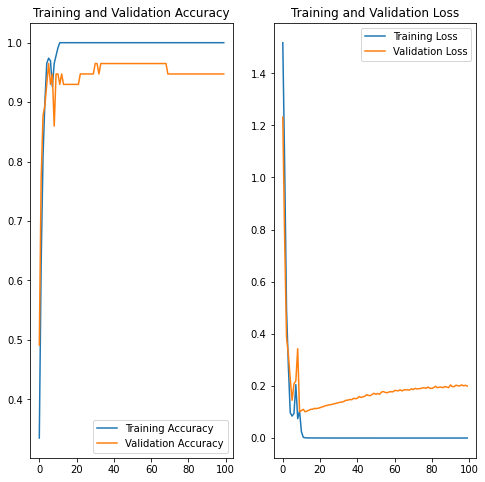

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
      input_shape=(img_height, img_width, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

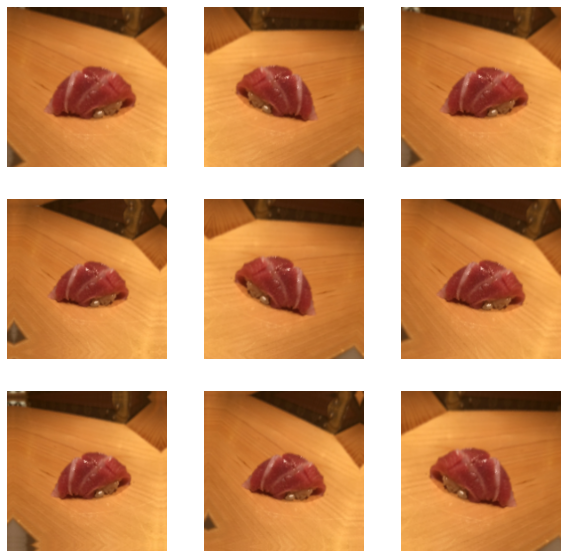

In [30]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [31]:
model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [32]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

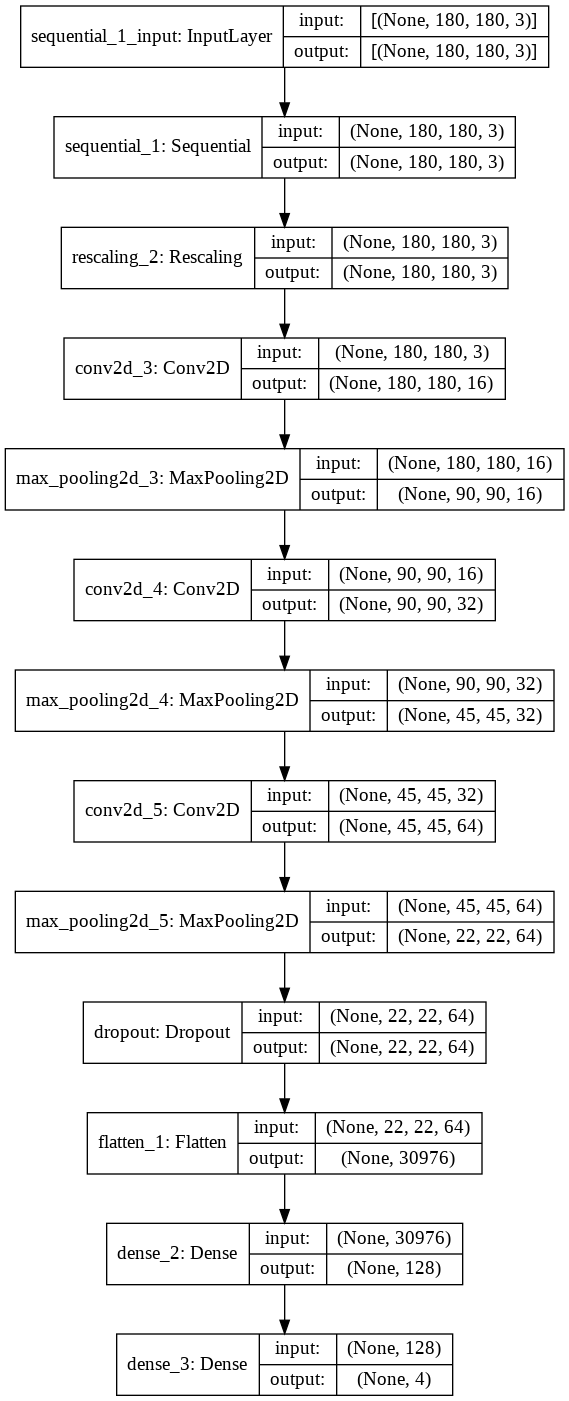

In [34]:
import tensorflow as tf
tf.keras.utils.plot_model(model,show_shapes=True)

In [35]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
26/26 [==============================] - 2s 29ms/step - loss: 1.4940 - accuracy: 0.2913 - val_loss: 1.2707 - val_accuracy: 0.4211
Epoch 2/100
26/26 [==============================] - 1s 20ms/step - loss: 1.3428 - accuracy: 0.3391 - val_loss: 1.2458 - val_accuracy: 0.5088
Epoch 3/100
26/26 [==============================] - 1s 20ms/step - loss: 1.2416 - accuracy: 0.4565 - val_loss: 0.9292 - val_accuracy: 0.5965
Epoch 4/100
26/26 [==============================] - 1s 20ms/step - loss: 1.0313 - accuracy: 0.6217 - val_loss: 0.9140 - val_accuracy: 0.6140
Epoch 5/100
26/26 [==============================] - 1s 21ms/step - loss: 0.9267 - accuracy: 0.6217 - val_loss: 0.7551 - val_accuracy: 0.7544
Epoch 6/100
26/26 [==============================] - 1s 21ms/step - loss: 0.8371 - accuracy: 0.6739 - val_loss: 0.7717 - val_accuracy: 0.7544
Epoch 7/100
26/26 [==============================] - 1s 20ms/step - loss: 0.8038 - accuracy: 0.6609 - val_loss: 0.7544 - val_accuracy: 0.7544
Epoch 

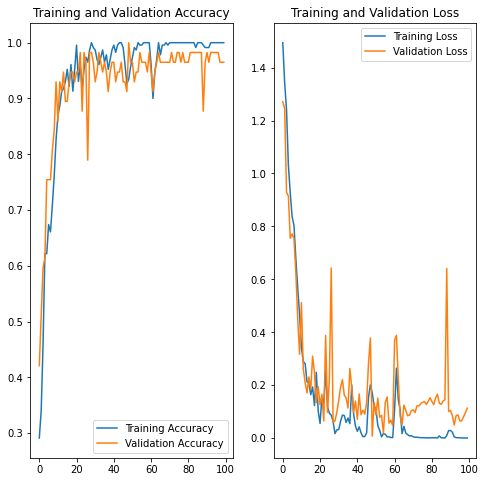

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()